<a href="https://colab.research.google.com/github/Manya123-max/Machine-Learning-Algorithms/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # Import Dropout here
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import GaussianNoise
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Load CIFAR-10 dataset
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values (scale between 0 and 1)
x_train_cifar = x_train_cifar.astype('float32') / 255.0
x_test_cifar = x_test_cifar.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train_cifar = to_categorical(y_train_cifar, 10)
y_test_cifar = to_categorical(y_test_cifar, 10)

# Define batch size and epochs
batch_size = 32
epochs = 10  # Adjust as needed

In [ ]:
# EarlyStopping Callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Number of epochs to wait before stopping
    restore_best_weights=True,  # Restore best weights after stopping
    verbose=1
)

In [ ]:
# CNN Model with L1 Regularization
model_l1 = Sequential([
    # First Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3),kernel_regularizer=l1(0.0001)),MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Layer
    Conv2D(64, (3, 3), activation='relu',kernel_regularizer=l1(0.0001)),MaxPooling2D(pool_size=(2, 2)),

    # Third Convolutional Layer
    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=l1(0.0001)),MaxPooling2D(pool_size=(2, 2)),

    # Flatten the data
    Flatten(),

    # Fully connected layer 1 with L1 regularization and Dropout
    Dense(512, activation='relu', kernel_regularizer=l1(0.0001)),
    Dropout(0.5),  # Add Dropout with 50% rate

    # Add Gaussian Noise to the first fully connected layer
    GaussianNoise(0.1),  # Add Gaussian Noise

    # Fully connected layer 2 with L1 regularization
    Dense(128, activation='relu', kernel_regularizer=l1(0.0001)),

    # Output Layer with 10 classes (CIFAR-10)
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the CNN model
model_l1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the CNN model with L1 regularization
history_l1 = model_l1.fit(x_train_cifar, y_train_cifar, epochs=epochs,batch_size=batch_size, validation_data=(x_test_cifar, y_test_cifar))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.2641 - loss: 2.4517 - val_accuracy: 0.4688 - val_loss: 1.6854
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.4690 - loss: 1.6907 - val_accuracy: 0.5284 - val_loss: 1.5253
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5265 - loss: 1.5495 - val_accuracy: 0.5731 - val_loss: 1.4382
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5707 - loss: 1.4626 - val_accuracy: 0.5809 - val_loss: 1.4189
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5859 - loss: 1.4153 - val_accuracy: 0.6220 - val_loss: 1.3303
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6128 - loss: 1.3636 - val_accuracy: 0.6270 - val_loss: 1.3216
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6294 - loss: 1.3202 - val_accuracy: 0.6139 - val_loss: 1.3691
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6426 - loss: 1.289

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6690 - loss: 1.2442
L1 Model Test Loss: 1.2565464973449707
L1 Model Test Accuracy: 0.6646000146865845
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


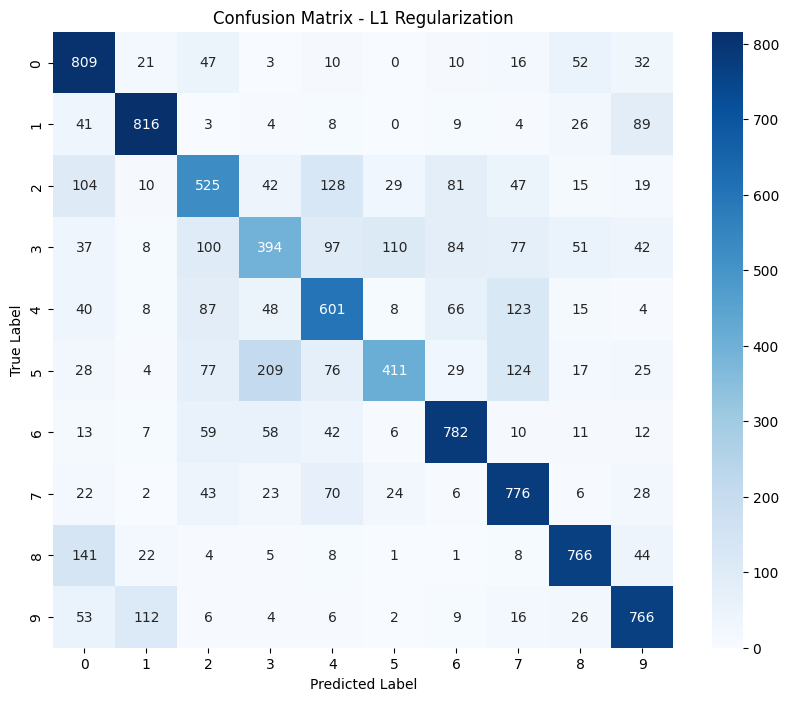

L1 Model Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.81      0.71      1000
           1       0.81      0.82      0.81      1000
           2       0.55      0.53      0.54      1000
           3       0.50      0.39      0.44      1000
           4       0.57      0.60      0.59      1000
           5       0.70      0.41      0.52      1000
           6       0.73      0.78      0.75      1000
           7       0.65      0.78      0.71      1000
           8       0.78      0.77      0.77      1000
           9       0.72      0.77      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



In [ ]:
# Evaluate the L1 model on test data
test_loss_l1, test_accuracy_l1 = model_l1.evaluate(x_test_cifar, y_test_cifar)
print(f"L1 Model Test Loss: {test_loss_l1}")
print(f"L1 Model Test Accuracy: {test_accuracy_l1}")

# Confusion Matrix for L1 Model
y_pred_l1 = model_l1.predict(x_test_cifar)
y_pred_classes_l1 = np.argmax(y_pred_l1, axis=1)
y_true_l1 = np.argmax(y_test_cifar, axis=1)

# Confusion Matrix
cm_l1 = confusion_matrix(y_true_l1, y_pred_classes_l1)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_l1, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - L1 Regularization')
plt.show()

# Classification Report for L1
print("L1 Model Classification Report:\n", classification_report(y_true_l1, y_pred_classes_l1))


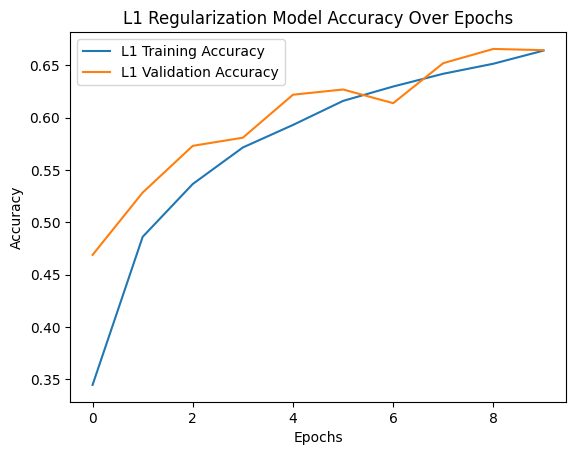

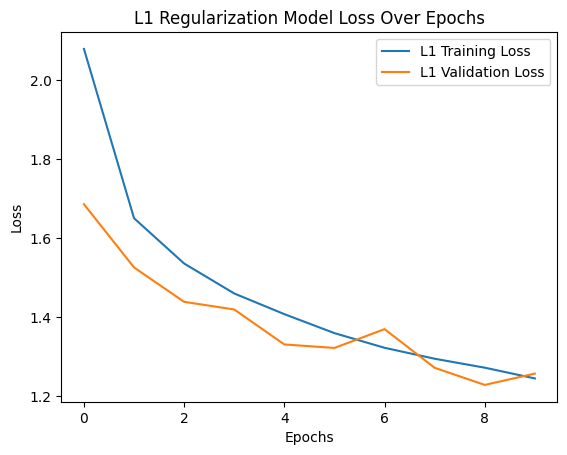

In [ ]:
# Plot accuracy and loss for L1 Regularization model
plt.plot(history_l1.history['accuracy'], label='L1 Training Accuracy')
plt.plot(history_l1.history['val_accuracy'], label='L1 Validation Accuracy')
plt.title('L1 Regularization Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_l1.history['loss'], label='L1 Training Loss')
plt.plot(history_l1.history['val_loss'], label='L1 Validation Loss')
plt.title('L1 Regularization Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# CNN Model with L2 Regularization
model_l2 = Sequential([
    # First Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3),
           kernel_regularizer=l2(0.0001)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Layer
    Conv2D(64, (3, 3), activation='relu',
           kernel_regularizer=l2(0.0001)),
    MaxPooling2D(pool_size=(2, 2)),

    # Third Convolutional Layer
    Conv2D(128, (3, 3), activation='relu',
           kernel_regularizer=l2(0.0001)),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the data
    Flatten(),


    # Fully connected layer 1 with L2 regularization and Dropout
    Dense(512, activation='relu', kernel_regularizer=l2(0.0001)),
    Dropout(0.5),  # Add Dropout with 50% rate

    # Add Gaussian Noise to the first fully connected layer
    GaussianNoise(0.1),  # Add Gaussian Noise

    # Fully connected layer 2 with L2 regularization
    Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),

    # Output Layer with 10 classes (CIFAR-10)
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the CNN model
model_l2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the CNN model with L2 regularization
history_l2 = model_l2.fit(x_train_cifar, y_train_cifar, epochs=epochs,batch_size=batch_size, validation_data=(x_test_cifar, y_test_cifar))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.2989 - loss: 1.9130 - val_accuracy: 0.5353 - val_loss: 1.3448
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.5357 - loss: 1.3402 - val_accuracy: 0.5894 - val_loss: 1.2058
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6067 - loss: 1.1810 - val_accuracy: 0.6434 - val_loss: 1.0986
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6498 - loss: 1.0762 - val_accuracy: 0.6552 - val_loss: 1.0744
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6792 - loss: 1.0066 - val_accuracy: 0.6740 - val_loss: 1.0330
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7029 - loss: 0.9553 - val_accuracy: 0.6899 - val_loss: 0.9897
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7277 - loss: 0.8994 - val_accuracy: 0.7133 - val_loss: 0.9446
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7384 - loss: 0.867

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7205 - loss: 0.9587
L2 Model Test Loss: 0.9660178422927856
L2 Model Test Accuracy: 0.7174000144004822
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


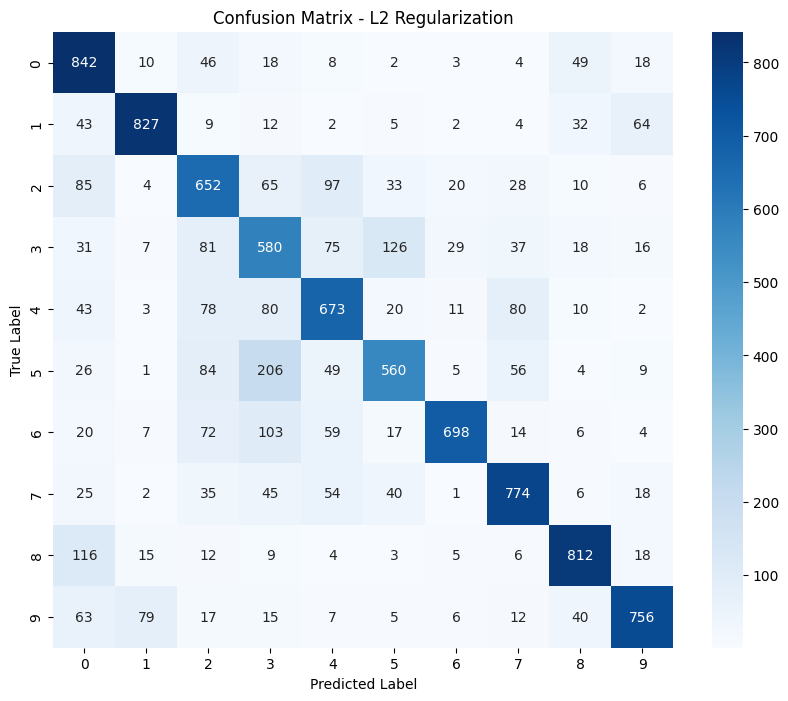

L2 Model Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.84      0.73      1000
           1       0.87      0.83      0.85      1000
           2       0.60      0.65      0.63      1000
           3       0.51      0.58      0.54      1000
           4       0.65      0.67      0.66      1000
           5       0.69      0.56      0.62      1000
           6       0.89      0.70      0.78      1000
           7       0.76      0.77      0.77      1000
           8       0.82      0.81      0.82      1000
           9       0.83      0.76      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



In [ ]:
# Evaluate the L2 model on test data
test_loss_l2, test_accuracy_l2 = model_l2.evaluate(x_test_cifar, y_test_cifar)
print(f"L2 Model Test Loss: {test_loss_l2}")
print(f"L2 Model Test Accuracy: {test_accuracy_l2}")

# Confusion Matrix for L2 Model
y_pred_l2 = model_l2.predict(x_test_cifar)
y_pred_classes_l2 = np.argmax(y_pred_l2, axis=1)
y_true_l2 = np.argmax(y_test_cifar, axis=1)

# Confusion Matrix
cm_l2 = confusion_matrix(y_true_l2, y_pred_classes_l2)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_l2, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - L2 Regularization')
plt.show()

# Classification Report for L2
print("L2 Model Classification Report:\n", classification_report(y_true_l2, y_pred_classes_l2))


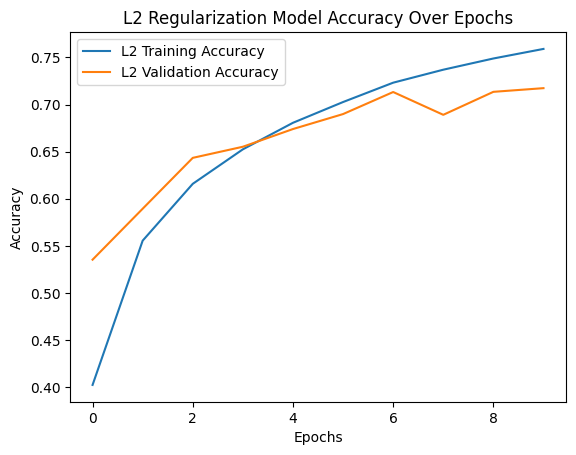

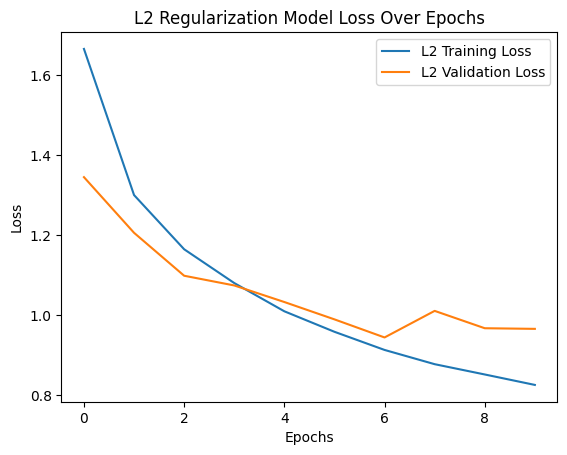

In [ ]:
# Plot accuracy and loss for L2 Regularization model
plt.plot(history_l2.history['accuracy'], label='L2 Training Accuracy')
plt.plot(history_l2.history['val_accuracy'], label='L2 Validation Accuracy')
plt.title('L2 Regularization Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_l2.history['loss'], label='L2 Training Loss')
plt.plot(history_l2.history['val_loss'], label='L2 Validation Loss')
plt.title('L2 Regularization Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
